In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp -r /content/gdrive/MyDrive/data/test1.zip /content/data
!cp -r /content/gdrive/MyDrive/data/val1.zip /content/data
!cp -r /content/gdrive/MyDrive/data/train1.zip /content/data

Mounted at /content/gdrive


In [ ]:
!7z x /content/data/val1.zip
!7z x /content/data/train1.zip
!7z x /content/data/test1.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,12 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (50657),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/data/                        1 file, 1915554068 bytes (1827 MiB)

Extracting archive: /content/data/val1.zip
 20% 4096 Open              --
Path = /content/data/val1.zip
Type = zip
Physical Size = 1915554068

  0%      1% 250 - val/live_images/004648.jpg                                       2% 461 - val/live_images/008739.jpg                                       3% 653 - val/live_images/012890.jpg                                       4%

In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def get_data_generators(train_dir, val_dir, test_dir, batch_size=32, target_size=(128, 128)):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = None
    val_generator = None
    test_generator = None


    if train_dir is not None:
        train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='binary'
        )


    if val_dir is not None:
        val_generator = val_test_datagen.flow_from_directory(
            val_dir,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='binary'
        )


    if test_dir is not None:
        test_generator = val_test_datagen.flow_from_directory(
            test_dir,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='binary',
            shuffle=False,
        )

    return train_generator, val_generator, test_generator

In [ ]:
import tensorflow as tf
from tensorflow.keras import models ,layers
def create_model():
    model = tf.keras.models.Sequential([


tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D (128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense (512, activation= 'relu'),
tf.keras.layers.Dense (1, activation='sigmoid')
    ])

    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
train_generator, val_generator, _ = get_data_generators(train_dir, val_dir, test_dir=None)

Found 91746 images belonging to 2 classes.
Found 19659 images belonging to 2 classes.


In [ ]:
model = create_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 40
batch_size = 32


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)
model.save('model.h5')

Epoch 1/40
2867/2867 [==============================] - 676s 234ms/step - loss: 0.3024 - accuracy: 0.8724 - val_loss: 0.3059 - val_accuracy: 0.8853
Epoch 2/40
2867/2867 [==============================] - 673s 235ms/step - loss: 0.1757 - accuracy: 0.9311 - val_loss: 0.1197 - val_accuracy: 0.9544
Epoch 3/40
2867/2867 [==============================] - 670s 234ms/step - loss: 0.1420 - accuracy: 0.9444 - val_loss: 0.1394 - val_accuracy: 0.9483
Epoch 4/40
2867/2867 [==============================] - 684s 238ms/step - loss: 0.1226 - accuracy: 0.9533 - val_loss: 0.1110 - val_accuracy: 0.9600
Epoch 5/40
2867/2867 [==============================] - 686s 239ms/step - loss: 0.1105 - accuracy: 0.9583 - val_loss: 0.3735 - val_accuracy: 0.8750
Epoch 6/40
2867/2867 [==============================] - 670s 234ms/step - loss: 0.1025 - accuracy: 0.9622 - val_loss: 0.1813 - val_accuracy: 0.9342
Epoch 7/40
2867/2867 [==============================] - 672s 234ms/step - loss: 0.0979 - accuracy: 0.9640 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


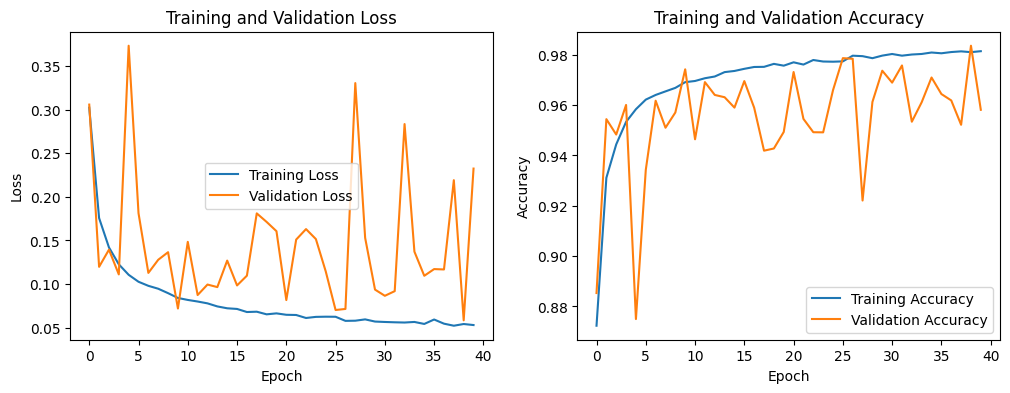

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
_, _, test_generator = get_data_generators(train_dir=None, val_dir=None, test_dir=r'/content/test')
model = tf.keras.models.load_model(r'/content/model.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 19662 images belonging to 2 classes.
615/615 [==============================] - 66s 107ms/step - loss: 0.2177 - accuracy: 0.9588
Test Loss: 0.2176537811756134
Test Accuracy: 0.9587529301643372


615/615 [==============================] - 66s 107ms/step


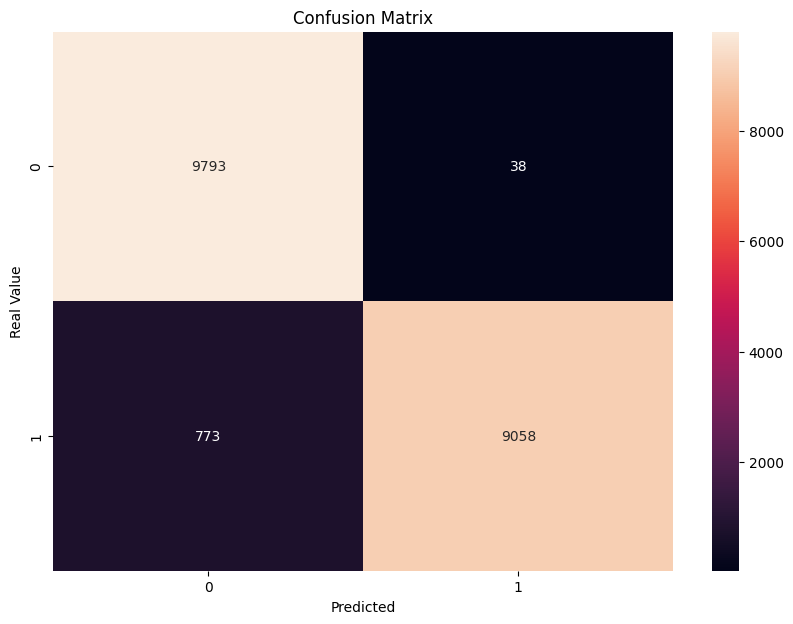

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int)  


y_true = test_generator.classes


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()